# Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import time
import torch
import torch.nn as nn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Train Data

In [ ]:
filepath = '/content/drive/My Drive/Colab Notebooks/STOCK PRICE PRED/NSE_train.csv'
df_train = pd.read_csv(filepath)
df_train = df_train.sort_values('Date')

df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
1,2020-01-02,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2,2020-01-03,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
3,2020-01-06,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
4,2020-01-07,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


Importing Test Data

In [ ]:
filepath = '/content/drive/My Drive/Colab Notebooks/STOCK PRICE PRED/NSE_test.csv'
df_test = pd.read_csv(filepath)
df_test = df_test.sort_values('Date')

df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-01,21727.750000,21834.349609,21680.849609,21741.900391,21741.900391,154000
1,2024-01-02,21751.349609,21755.599609,21555.650391,21665.800781,21665.800781,263700
2,2024-01-03,21661.099609,21677.000000,21500.349609,21517.349609,21517.349609,311900
3,2024-01-04,21605.800781,21685.650391,21564.550781,21658.599609,21658.599609,339200
4,2024-01-05,21705.750000,21749.599609,21629.199219,21710.800781,21710.800781,309300


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 0 to 990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       991 non-null    object 
 1   Open       991 non-null    float64
 2   High       991 non-null    float64
 3   Low        991 non-null    float64
 4   Close      991 non-null    float64
 5   Adj Close  991 non-null    float64
 6   Volume     991 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 94.2+ KB


In [ ]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,991.000000,991.000000,991.000000,991.000000,991.000000,9.910000e+02
mean,15822.760745,15900.697561,15716.523084,15812.712220,15812.712220,4.038158e+05
std,3121.117024,3112.728627,3130.668302,3124.026557,3124.026557,2.194238e+05
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,13812.775391,13932.549805,13693.399902,13845.375000,13845.375000,2.488500e+05
50%,16933.250000,17062.449219,16820.400391,16945.050781,16945.050781,3.147000e+05
75%,17974.149414,18085.950195,17881.924805,17995.674805,17995.674805,5.434000e+05
max,21737.650391,21801.449219,21678.000000,21778.699219,21778.699219,1.811000e+06


In [ ]:
df_train.Date.iloc[0],df_train.Date.iloc[-1]

('2020-01-01', '2023-12-29')

In [ ]:
df_train.Date.iloc[0],df_train.Date.iloc[-1]

('2020-01-01', '2023-12-29')

# EDA

Plotting Close Price of NSE from Train Data

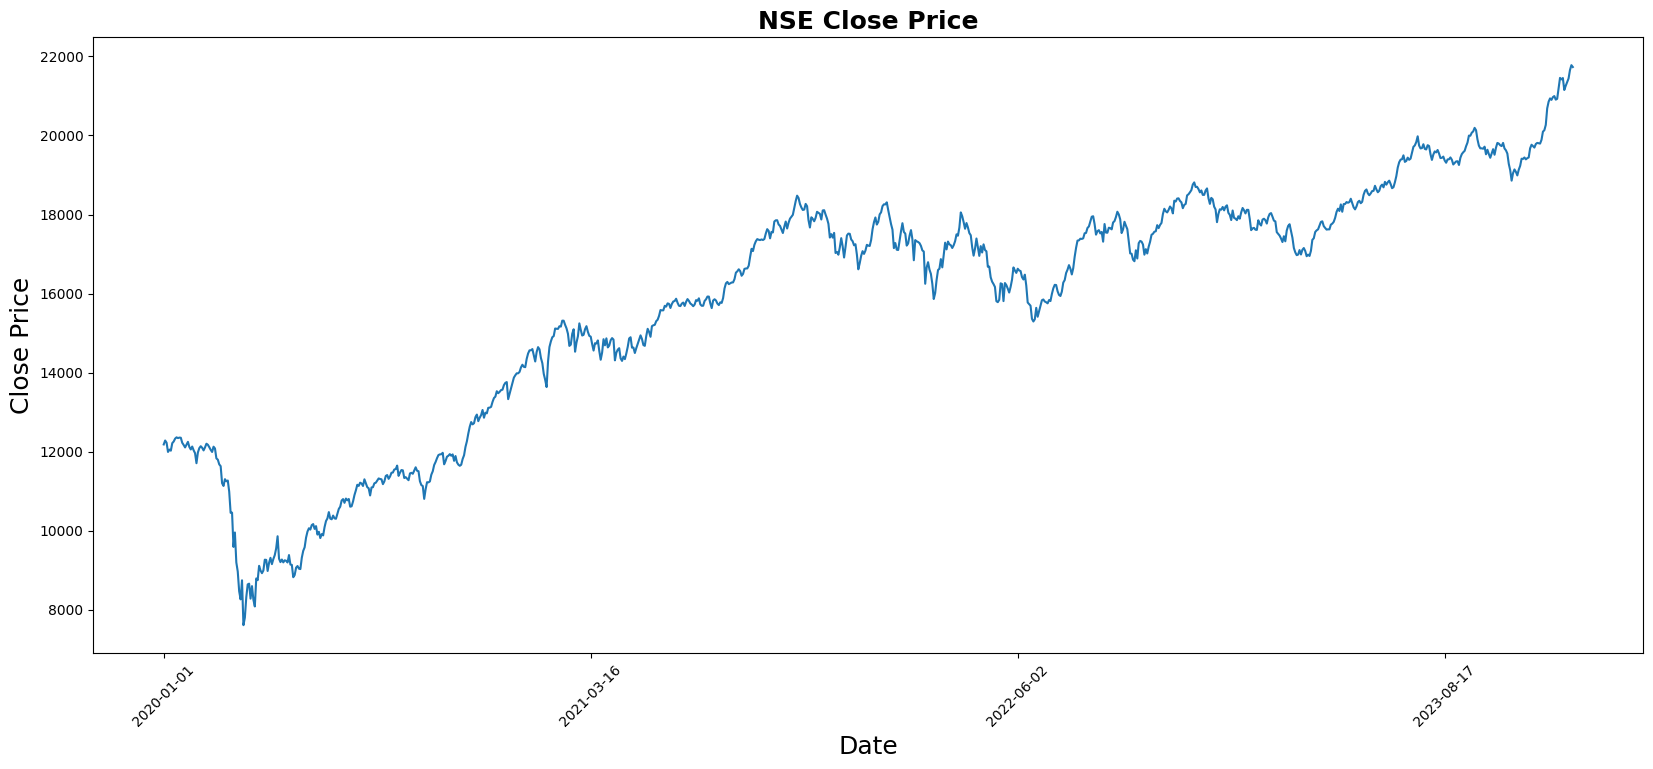

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(df_train[['Close']])
plt.xticks(range(0,df_train.shape[0],300),df_train['Date'].loc[::300],rotation=45)
plt.title("NSE Close Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

# Data Preprocessing

## Normalization

Using MinMaxScalar on Train and Test Data

In [ ]:
price_train = df_train[['Close']]

scaler = MinMaxScaler(feature_range=(-1, 1))
price_train['Close'] = scaler.fit_transform(price_train['Close'].values.reshape(-1,1))
print(price_train.head())
print(price_train.shape)

price_test = df_test[['Close']]

scaler = MinMaxScaler(feature_range=(-1, 1))
price_test['Close'] = scaler.fit_transform(price_test['Close'].values.reshape(-1,1))
print(price_test.shape)

      Close
0 -0.354587
1 -0.340514
2 -0.348355
3 -0.381330
4 -0.372874
(991, 1)
(51, 1)


<ipython-input-10-bc75253471e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_train['Close'] = scaler.fit_transform(price_train['Close'].values.reshape(-1,1))
<ipython-input-10-bc75253471e0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_test['Close'] = scaler.fit_transform(price_test['Close'].values.reshape(-1,1))


## Train Test Split

In [ ]:
def split_data(stock_tr,stock_ts, lookback):
    data_raw_tr = stock_tr.to_numpy()
    data_tr = []
    for index in range(len(data_raw_tr) - lookback):
        data_tr.append(data_raw_tr[index: index + lookback])

    data_raw_ts = stock_ts.to_numpy()
    data_ts = []

    for index in range(len(data_raw_ts) - lookback):
        data_ts.append(data_raw_ts[index: index + lookback])

    data_tr = np.array(data_tr);
    data_ts = np.array(data_ts);

    x_train = data_tr[:,:-1,:]
    y_train = data_tr[:,-1,:]

    x_test = data_ts[:,:-1]
    y_test = data_ts[:,-1,:]

    return [x_train, y_train, x_test, y_test]

In [ ]:
lookback = 7
x_train, y_train, x_test, y_test = split_data(price_train,price_test, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (984, 6, 1)
y_train.shape =  (984, 1)
x_test.shape =  (44, 6, 1)
y_test.shape =  (44, 1)


Converting train and test data into pytorch tensors

In [ ]:
x_train = torch.from_numpy(x_train).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)

x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

Defining a seed value

In [ ]:
seed = 42
torch.manual_seed(seed)

# GRU Model

## Defining Parameters

In [ ]:
input_dim = 1
output_dim = 1

hidden_dim = 256 #512

num_layers = 1 #2
num_epochs = 200 #300

## Building the Model

In [ ]:
class GRUModel(nn.Module):
  def __init__(self, input_dimen, hidden_dimen, num_layers, output_dimen):
    super(GRUModel, self).__init__()
    self.hidden_dimen = hidden_dimen
    self.num_layers = num_layers
    self.gru = nn.GRU(input_dimen, hidden_dimen, num_layers, batch_first=True, dropout=0.2)
    self.fc = nn.Linear(hidden_dimen, output_dimen)
    self.relu = nn.ReLU()

  def forward(self, a):
    # If input is 2D, add a batch dimension
    if a.dim() == 2:
        a = a.unsqueeze(0)

    batch_size = a.size(0)
    h0 = torch.zeros(self.num_layers, a.size(0), self.hidden_dimen).requires_grad_()
    output, h = self.gru(a, h0.detach())
    output = self.fc(self.relu(output[:, -1,:]))
    return output

In [ ]:
model = GRUModel(input_dim, hidden_dim, num_layers, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Calculating MSE on Train and Test

In [ ]:
import time
hist = np.zeros(num_epochs)
start_time = time.time()
for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_gru)

    l2_lambda = 0.001
    l2_norm = sum(p.pow(2.0).sum()
                  for p in model.parameters())

    loss = loss + l2_lambda * l2_norm

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_test_pred = model(x_test)
    loss_test = criterion(y_test_pred, y_test_gru)

    print("Epoch ", t+1, "MSE: ", loss.item(), "MSE Test: ", loss_test.item())
    hist[t] = loss_test.item()

training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  1 MSE:  0.005644630640745163 MSE Test:  0.10527703166007996
Epoch  2 MSE:  0.005620523355901241 MSE Test:  0.10515593737363815
Epoch  3 MSE:  0.005596780218183994 MSE Test:  0.10503708571195602
Epoch  4 MSE:  0.005573399364948273 MSE Test:  0.10491835325956345
Epoch  5 MSE:  0.0055503700859844685 MSE Test:  0.1047978475689888
Epoch  6 MSE:  0.005527688190340996 MSE Test:  0.10467639565467834
Epoch  7 MSE:  0.005505349487066269 MSE Test:  0.1045553907752037
Epoch  8 MSE:  0.005483346059918404 MSE Test:  0.10443674772977829
Epoch  9 MSE:  0.005461657885462046 MSE Test:  0.1043185442686081
Epoch  10 MSE:  0.005440291482955217 MSE Test:  0.10419978946447372
Epoch  11 MSE:  0.005419247783720493 MSE Test:  0.10408174991607666
Epoch  12 MSE:  0.005398519802838564 MSE Test:  0.10396616905927658
Epoch  13 MSE:  0.005378095433115959 MSE Test:  0.10385312885046005
Epoch  14 MSE:  0.005357956513762474 MSE Test:  0.1037401407957077
Epoch  15 MSE:  0.005338119342923164 MSE Test:  0.1036255583

In [ ]:
actuals = pd.DataFrame(scaler.inverse_transform(y_train_gru.detach().numpy()))
print(actuals.head())
preds = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
print(preds.head())

              0
0  21646.675781
1  21650.296875
2  21656.738281
3  21659.638672
4  21657.957031
              0
0  21632.480469
1  21637.839844
2  21642.494141
3  21648.171875
4  21653.302734


# Plotting Train Values

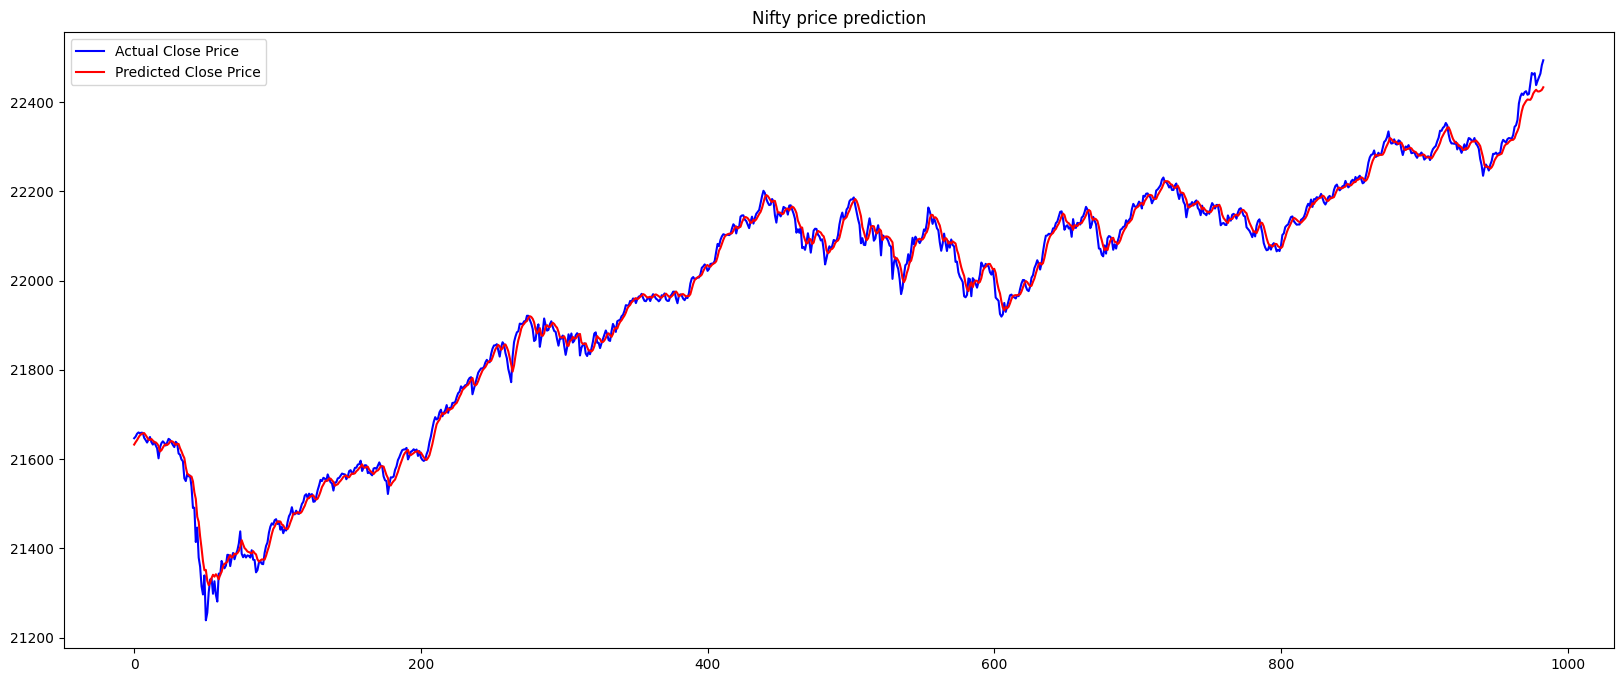

In [ ]:
train = price_train[0:len(actuals)]
valid = actuals
valid['Predictions'] = preds
plt.figure(figsize=(20,8))
plt.plot(valid[0], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'], color = 'red', label = 'Predicted Close Price')
plt.title('Nifty price prediction')
plt.legend()
plt.show()

# Plotting Test Loss

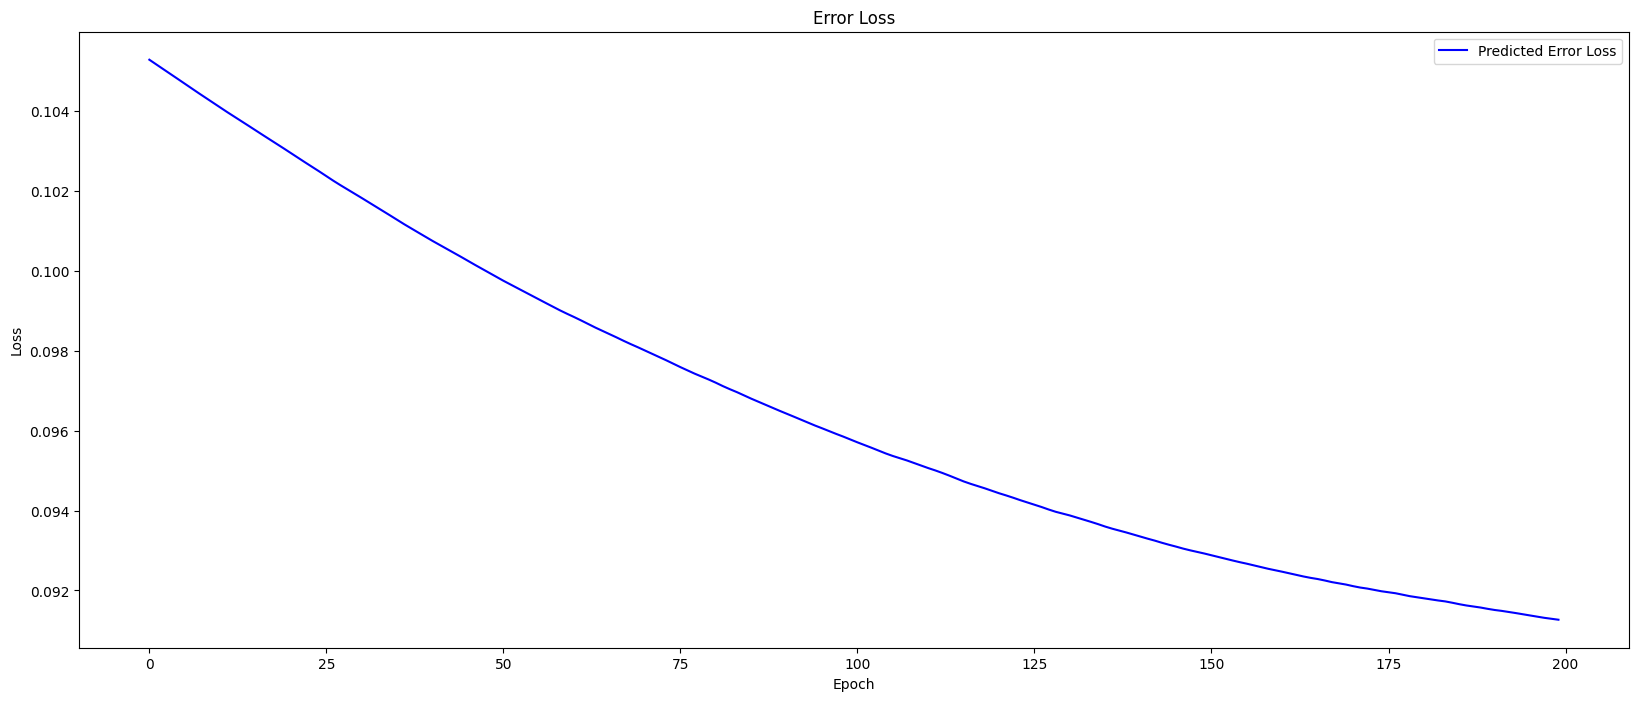

In [ ]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(20,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(x_test.shape)
print(y_test.shape)

torch.Size([44, 6, 1])
(44, 1)


# RMSE

In [ ]:
import math, time
from sklearn.metrics import mean_squared_error


# invert predictions
y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_gru.detach().numpy())

y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_gru.detach().numpy())

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 18.83 RMSE
Test Score: 189.53 RMSE


# Plotting TestValues

Actual Close Scalar
              0
0  21544.849609
1  21618.697266
2  21647.199219
3  21894.550781
4  22097.449219
Predicted Close Scalar
              0
0  21600.625000
1  21573.748047
2  21589.572266
3  21614.453125
4  21731.298828


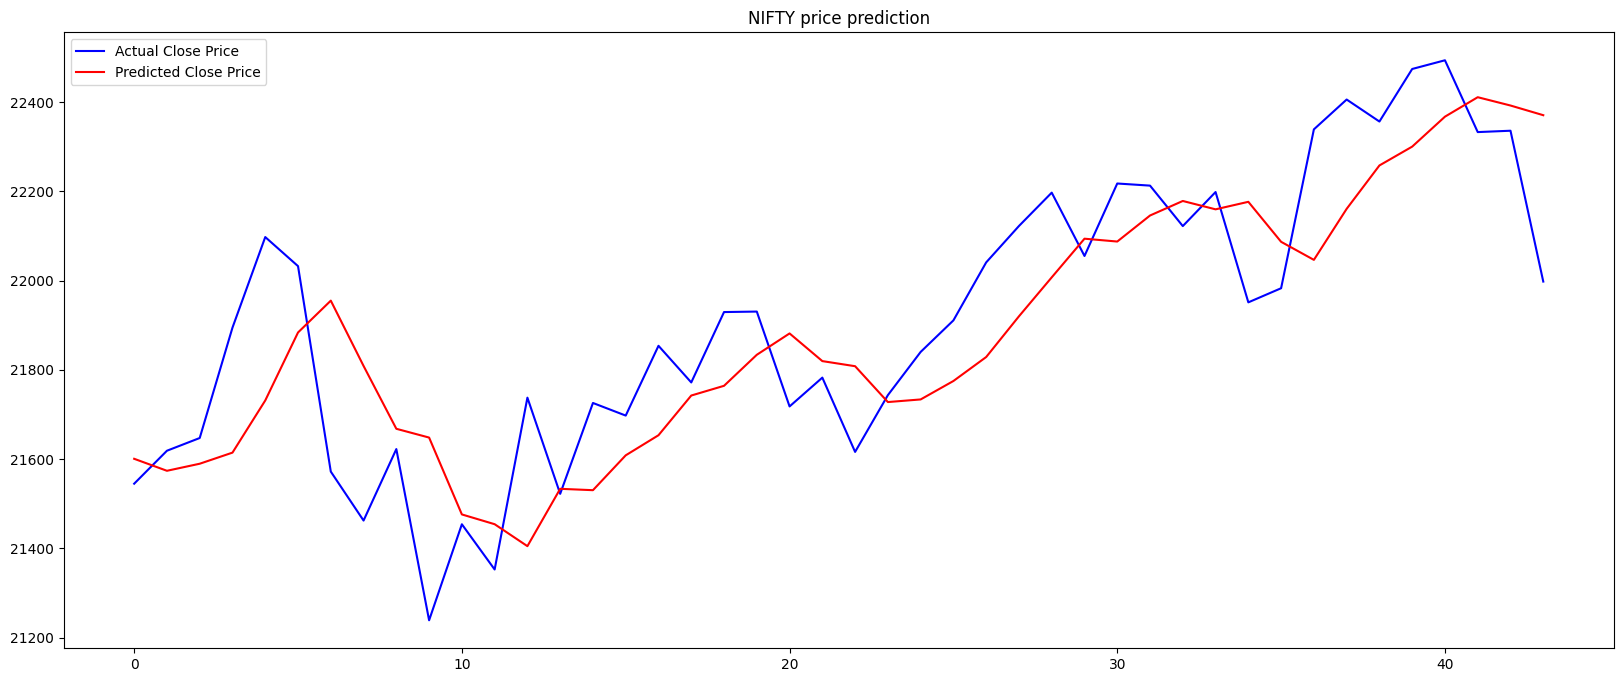

In [ ]:
actuals = pd.DataFrame(y_test)
print("Actual Close Scalar")
print(actuals.head())
preds = pd.DataFrame(y_test_pred)
print("Predicted Close Scalar")
print(preds.head())

valid = actuals
valid['Predictions'] = preds

plt.figure(figsize=(20,8))
plt.plot(valid[0], color = 'blue', label = 'Actual Close Price')
plt.plot(valid["Predictions"], color = 'red', label = 'Predicted Close Price')
plt.title('NIFTY price prediction')
plt.legend()
plt.show()